<a href="https://colab.research.google.com/github/jakubtwalczak/Muller_Guido_Introduction_to_ML/blob/main/Rozdzia%C5%82_2_uczenie_nadzorowane_cz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uwaga - do dalszej pracy potrzebować będziemy biblioteki mglearn, która nie znajduje się standardowo w zasobach Google Colab, jednak możemy ją zainstalować w notatniku.

In [1]:
!pip install mglearn

# Ładowanie danych.

Ładujemy syntetyczny zestaw danych **forge**. Zawiera on dwie cechy i zmienną zależną - etykietę.

In [2]:
import mglearn
X, y = mglearn.datasets.make_forge()

In [3]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [4]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

Zestaw składa się z 26 punktów danych i 2 cech.

In [5]:
X.shape

(26, 2)

Na wykresie punktowym zobrazujemy podział punktów danych na klasy, przedstawiając klasę 0 jako kropki, a 1 - trójkąty.

Text(0, 0.5, 'Second feature')

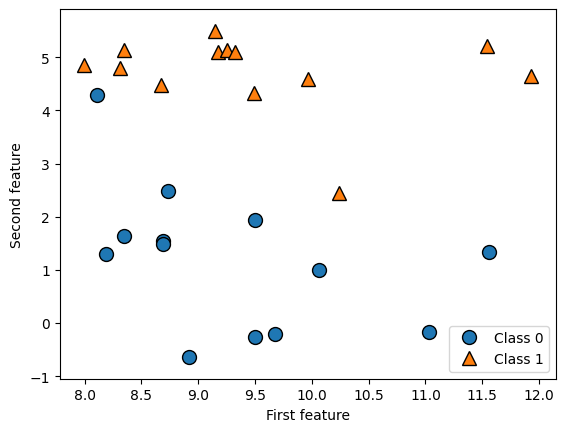

In [6]:
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

Innym syntetycznym zestawem danych jest **wave**, który ma jedną zmienną niezależną i ciągłą zmienną docelową. Dobrze nadaje się on do zwizualizowania regresji, w formie wykresu punktowego.

Text(0, 0.5, 'Target')

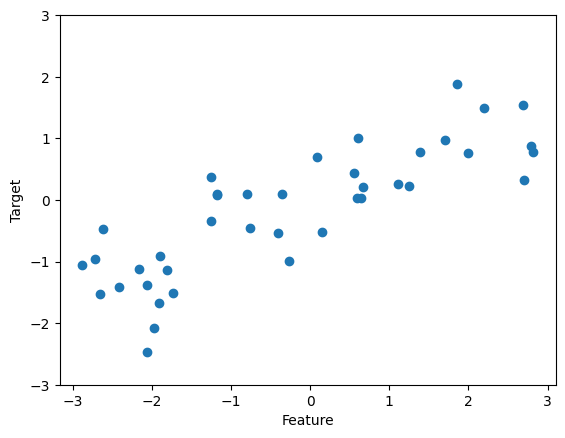

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Takie proste, niskowymiarowe datasety idealnie nadają się do zilustrowania zależności cech, a także sprawdzania na nich działania algorytmów. Na ogół jednak mierzymy się z raportami mającymi więcej niż dwa wymiary, których nie da się tak łatwo przedstawić w formie wykresu.

W bibliotece scikit-learn posiadamy wiele innych, rzeczywistych zestawów. W tym notatniku wykorzystamy dwa zestawy - **cancer** (dane dot. przypadków raka piersi z Wisconsin) oraz **boston** (dot. cen domów w Bostonie w latach 70. XX w.). Pierwszy z nich służy klasyfikacji binarnej (guz złośliwy lub łagodny), zaś drugi regresji liniowej (w tym wypadku, przewidywaniu wartości ciągłej, jaką jest wartość domu).

Dataset cancer ładujemy funkcją load_breast_cancer z modułu sklearn.datasets.

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
print(f"cancer.keys: {cancer.keys()}")

cancer.keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Na zestaw składa się 569 punktów danych, po 30 cech każdy.

In [10]:
print(f"Shape of cancer data: {cancer.data.shape}")

Shape of cancer data: (569, 30)


Wyświetlamy liczebność przypadków - złośliwych (ang. malignant) jest 212, łagodnych (ang. benign) 357.

In [11]:
import numpy as np

print(f"Sample counts per class:\n{dict(zip(cancer.target_names, (np.bincount(cancer.target))))}")

Sample counts per class:
{'malignant': 212, 'benign': 357}


Sprawdzamy też opis znaczenia każdej cechy, używając atrybutu feature_names.

In [12]:
print(f"Feature names:\n{cancer.feature_names}")

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Dla uzyskania szerszych informacji nt. danych, używamy atrybutu DESCR.

In [13]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Ładujemy również zbiór boston. Będzie to jego rozszerzony wariant z biblioteki mglearn, zawierający cechy wynikające z wszystkich interakcji między cechami pierwotnymi (przez co liczba cech rośnie z 13 do 104, zwiększa się bowiem o 91 możliwych kombinacji między parami cech).

In [14]:
from mglearn.datasets import load_extended_boston
boston = load_extended_boston()

Zestawów tych użyjemy w celu wyjaśnienia i zobrazowania właściwości różnych algorytmów uczenia maszynowego.

# K-najbliższych sąsiadów (k-nearest neighbors).

Prawdopodobnie najprostszy w działaniu i w zrozumieniu algorytm machine learning. Modele na nim oparte wyszukują w zestawie danych uczących punktów najbliższych do tego, który jest przedmiotem predykcji.

## Klasyfikacja k-NN.

W najprostszej postaci algorytm k-NN bierze pod uwagę tylko jednego najbliższego sąsiada, który jest najbliższy dla punktu prognozowanego, jako że wynik dla niego jest znany.

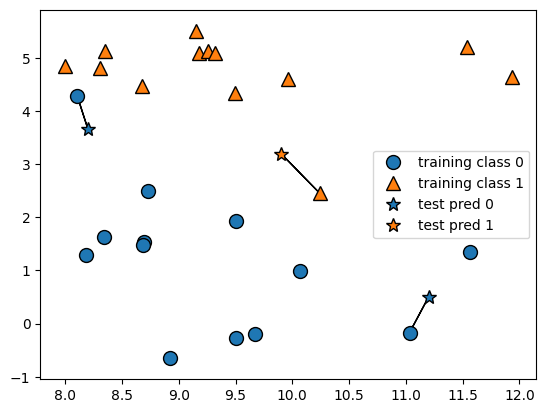

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Powyższy przykład (korzystający ze zbioru forge) ilustruje dopasowanie modelu k-NN przy wskazaniu jednego sąsiada jako parametru. Na wykresie dodaliśmy trzy nowe punkty (w formie gwiazdek, której kolor odpowiada wynikowi przewidywania). Dla każdego z nich dopasowany został jeden najbliższy punkt sąsiadujący, którego etykieta jest wynikiem predykcji.

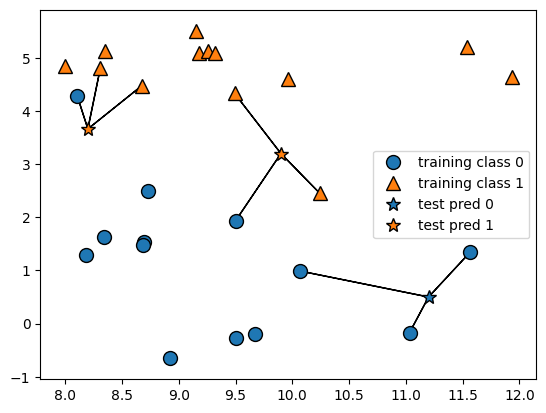

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Jednak, zamiast wybierać tylko jednego sąsiada, można brać pod uwagę dowolną liczbę sąsiadów - czyli k (parametr n_neighbors). Gdy uwzględniamy więcej niż jednego sąsiada, algorytm stosuje mechanizm głosowania i dla każdego z punktów liczy, do której z klas przynależy większa liczba sąsiadów. Klasa przeważająca jest tą przypisaną w prognozie.

Algorytm ten można z równym powodzeniem stosować do klasyfikacji binarnej, jak i wieloklasowej. W przypadku większej liczby klas ponownie liczymy, ilu sąsiadów należy do danej klasy, i wybieramy najczęściej w tym podzbiorze reprezentowaną klasę.

A jak wygląda implementacja tego modelu w scikit-learn? Zacznijmy od podział na zbiór treningowy i testowy.

In [17]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Importujemy klasę i tworzymy jej instancję, możemy określić parametry dla tejże instancji.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

Następnie dopasowujemy model do zestawu treningowego. W przypadku tej konkretnej klasy oznacza to przechowywanie zestawu danych, aby je wykorzystać do prognozowania.

In [19]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Aby tworzyć prognozy, należy skorzystać z metody predict. Dla każdego punktu w zbiorze testowym wskazuje się jego najbliższych sąsiadów i typuje spośród nich najbardziej powszechną klasę.

In [20]:
print(f"Test set predictions: {clf.predict(X_test)}")

Test set predictions: [1 0 1 0 1 0 0]


Dla oceny tego, jak model radzi sobie z uogólnianiem, wybieramy metodę score z danymi testowymi i ich faktycznymi etykietami. Dokładność (accuracy) modelu wynosi ok. 0,86.

In [21]:
print(f"Test set accuracy: {clf.score(X_test, y_test)}")

Test set accuracy: 0.8571428571428571


Dla zestawów danych o dwóch wymiarach możemy również zilustrować prognozowanie dla wszystkich możliwych punktów testowych na płaszczyźnie XY - kolorujemy ją zgodnie z klasą, która byłaby przypisana do punktu w tym regionie, dzięki czemu mamy zarysowaną granicę decyzyjną, oddzielającą przestrzenie, w których algorytm przypisuje klasy próbkom danych.

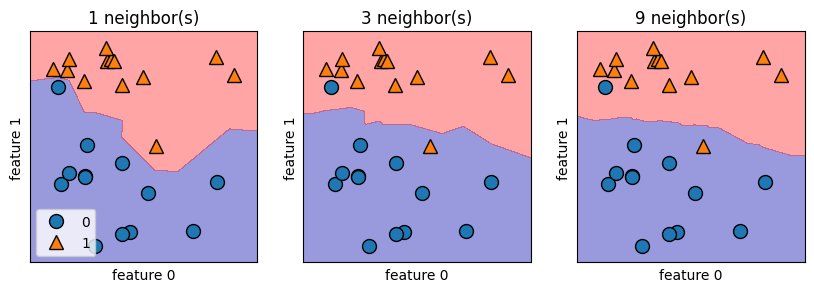

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Widoczne jest, że użycie jednego sąsiada skutkuje tym, że wytyczona granica decyzyjna jest ściśle zgodna z danymi uczącymi. Im większą liczbę sąsiadów uwzględniamy, tym gładsza jest ta granica. Tym samym model wydaje się być mniej złożony, a co za tym idzie, bardziej uogólniający. Zasadą jest więc to, że model jest tym bardziej złożony, im mniej sąsiadów użyto do przewidywania. Skrajny przypadek to wskazanie tylu sąsiadów, ile jest próbek danych w zbiorze treningowym - wówczas wszystkie próbki będą miały tych samych sąsiadów, przez co prognozy byłyby takie same: klasa najczęściej występująca w zbiorze uczącym.

Na rzeczywistym zestawie cancer zbadamy, czy ww. wniosek o złożoności modelu można potwierdzić. Najpierw jednak ocenimy jakość jego uczenia i przetestujemy wydajność z różną liczbą sąsiadów.

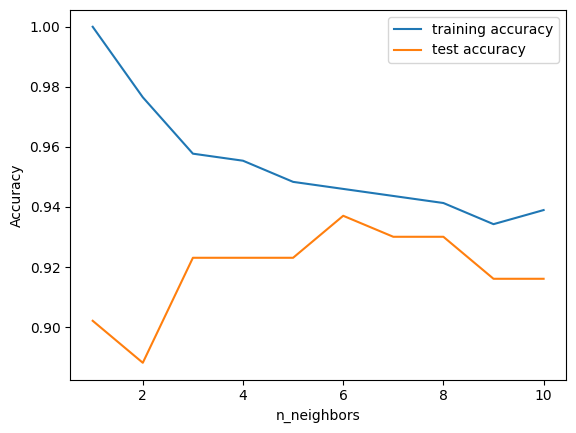

In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Prognoza jest doskonała, gdyby wziąć pod uwagę prognozę algorytmu z jednym sąsiadem na zbiorze uczącym. Gdy jednak weźmiemy pod uwagę większą liczbę sąsiadów, model staje się mniej złożony. Dokładność uczenia spada, ale lepiej wygląda zdolność do uogólniania. Optymalny punkt przewidywania znajduje się mniej więcej na poziomie sześciu sąsiadów. Najgorsza wydajność występuje przy dokładności ok. 0,88.

## Regresja k-sąsiadów.

Aby zobaczyć działanie wariantu regresji algorytmu k-najbliższych sąsiadów, używamy zestawu wave. Na osi X dodajemy trzy punkty danych testowych w postaci zielonych gwiazd. Wynik prognozy to - przy zastosowaniu jednego sąsiada - wynik najbardziej zbliżonego punktu.

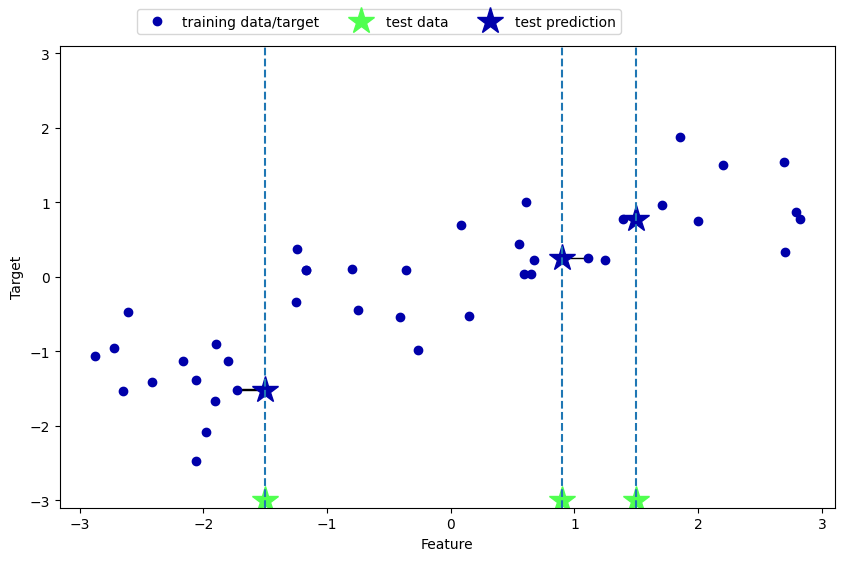

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Kiedy stosujemy wielu najbliższych sąsiadów, wynik prognozy to średnia wartości tychże.

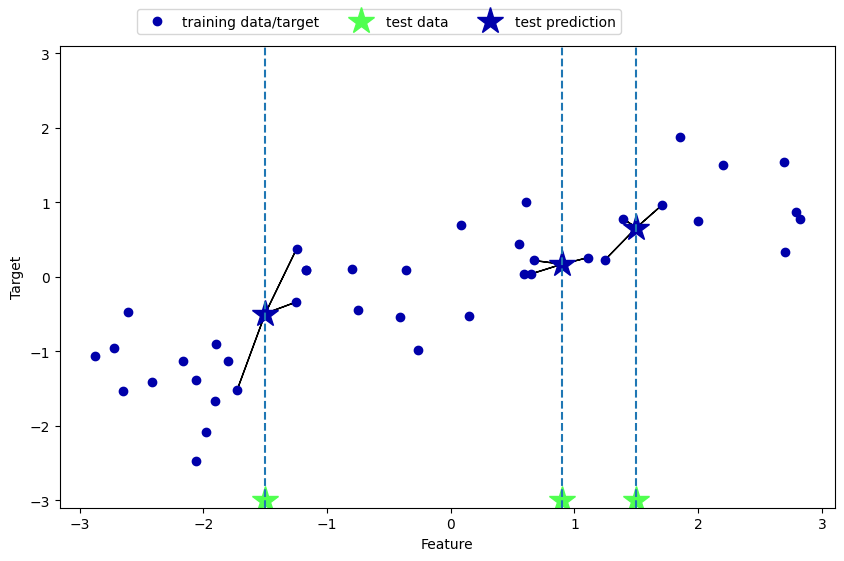

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

W scikit-learn algorytm regresji k-najbliższych sąsiadów jest zaimplementowany w klasie KNeighborsRegressor.

In [26]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print(f"Test set predictions:\n{reg.predict(X_test)}")

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Model możemy również ocenić metodą punktacji, która zwraca dla regresorów współczynnik R^2. Rezultat wynosi ok. 0,834, co wskazuje na stosunkowo dobre dopasowanie modelu regresji.

In [27]:
print(f"Test set R^2: {reg.score(X_test, y_test)}")

Test set R^2: 0.8344172446249605


W przypadku jednowymiarowego zestawu danych można zobaczyć, jak przedstawiają się prognozy dla wszystkich możliwych wartości cech. Gdy używamy tylko jednego sąsiada, model dopasowuje się do danych treningowych, ale przez to bardzo słabo uogólnia. Uwzględnienie większej liczby sąsiadów prowadzi do prognoz mniej dopasowanych do danych uczących, ale za to model ma wyraźnie wyższą zdolność do generalizacji.

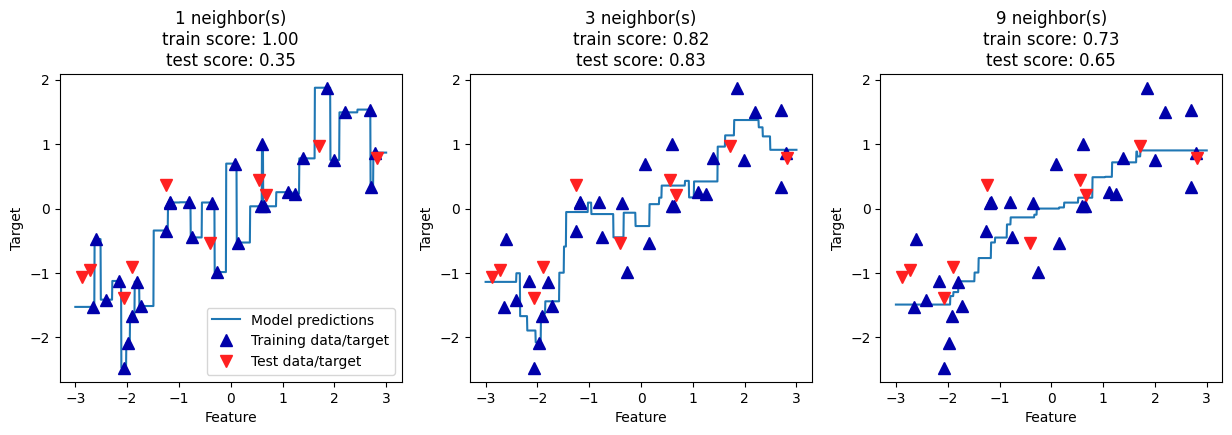

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        f"{n_neighbors} neighbor(s)\n"
        f"train score: {reg.score(X_train, y_train):.2f}\n"
        f"test score: {reg.score(X_test, y_test):.2f}"
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

## Podsumowanie.

Modele k-najbliższych sąsiadów mają co do zasady raptem dwa istotne parametry - liczbę sąsiadów i miarę odległości między punktami (domyślnie - euklidesowa).

Plusy:
- model prosty do zrozumienia,
- rozsądna wydajność bez konieczności zbytniego dostrajania,
- dobry jako metoda wstępnego wypróbowania przed zastosowaniem bardziej zaawansowanych algorytmów,
- na ogół szybki w działaniu.

Minusy:
- może predykować powoli przy większym zbiorze treningowym,
- nie radzi sobie z danymi o dużej liczbie cech lub z rzadkimi zestawami (takimi, w których większość cech ma przez większy czas wartość 0).

# Modele liniowe.

Służą do prognozowania cech wejściowych przy użyciu funkcji liniowej. W praktyce są stosowane od wielu lat.

W przypadku regresji ogólny wzór prognozowania wygląda następująco:

y_pred = w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b

gdzie x[0], ... x[p] to cechy w zbiorze posiadającym p cech, w i b to parametry uczonego modelu, a y_pred to prognoza modelu.

W zbiorze z jedną cechą:

y_pred = w[0]x[0] + b

Z punktu widzenia podstawowej matematyki jest to równanie prostej. Współczynnik w[0] reprezentuje nachylenie, zaś b - wyraz wolny - to przesunięcie względem osi Y. Alternatywnie - suma ważona cech wejściowych z wagami opisanymi przez parametry w (mogą być ujemne).


Sprawdźmy działanie regresji liniowej na zestawie danych wave.

w[0]: 0.393906  b: -0.031804


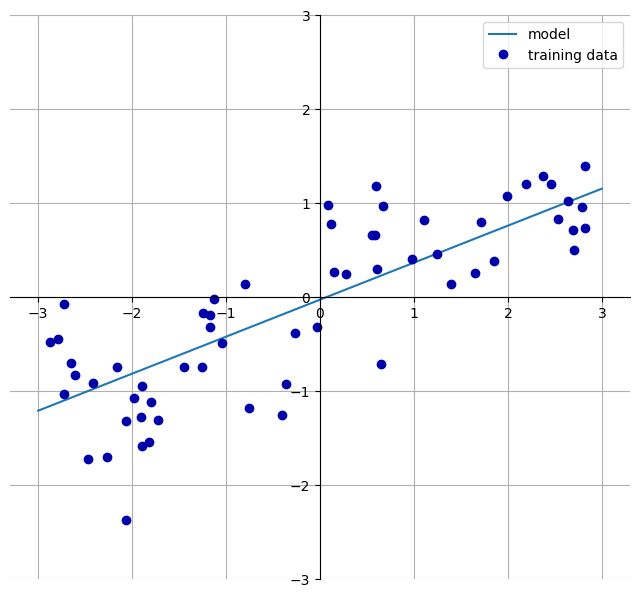

In [29]:
mglearn.plots.plot_linear_regression_wave()

Dodane osie układu współrzędnych ułatwiają zrozumienie przebiegu funkcji. Współczynnik w[0] wynosi ok. 0,4, natomiast b ok. -0,03; współczynnik b to punkt przecięcia prostej z osią Y.

Liniowe modele regresji możemy charakteryzować jako modele, w których wykres prognozy dla pojedynczej cechy jest prostą, a dla >1 cechy - płaszczyzną. Z pozoru tego typu algorytm może wydawać się bardzo ograniczający, powodujący utratę wielu drobnych szczegółów danych. Można tak uznać pod warunkiem założenia, że zmienna zależna jest liniową kombinacją cech. Tak naprawdę jednak te modele wiele zyskują przy predykcji danych z wieloma cechami - mogą się okazać bardzo mocnym narzędziem. Szczególnie jeżeli mamy więcej funkcji niż punktów danych treningowych, możemy cel y idealnie modelować jako funkcję liniową.

A jakie mamy rodzaje regresji liniowej?

## Metoda najmniejszych kwadratów - klasyczna regresja liniowa.

Regresja liniowa, znana też jako metoda najmniejszych kwadratów (ang. OLS - ordinary least squares), jako najprostsza metoda, ma za zadanie odnaleźć takie wartości w i b, aby zminimalizować średni błąd kwadratowy między prognozami a wartościami rzeczywistymi celu regresji - y.

In [30]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Parametr nachylenia - w - przechowuje atrybut coef_, zaś wyraz wolny b - intercept_. Atrybut intercept_ ma postać pojedynczej liczby zmiennoprzecinkowej, a coef_ - tablicy NumPy z jednym wpisem na każdą zmienną wejściową.

In [31]:
print(f"Training set score: {lr.score(X_train, y_train)}")
print(f"Test set score: {lr.score(X_test, y_test)}")

Training set score: 0.6700890315075756
Test set score: 0.65933685968637


Wyniki wydajności w obu zbiorach są nieszczególnie satysfakcjonujące, ale w stosunku do zestawu treningowego i testowego są zbliżone. Świadczy to o tym, iż model zmaga się z underfittingiem - niedopasowaniem.

Zestaw danych wave jest jednowymiarowy, więc ryzyko niedopasowania jest nieduże. Przyjrzyjmy się więc działaniu modelu regresji na bardziej złożonym zestawie danych - boston. Przeprowadzimy standardową procedurę - podział zbiorów oraz dopasowanie danych.

In [32]:
X, y = boston
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print(f"Training set score: {lr.score(X_train, y_train)}")
print(f"Test set score: {lr.score(X_test, y_test)}")

Training set score: 0.9520519609032728
Test set score: 0.6074721959665773


Prognozy w zestawie treningowym są bardzo dokładne (R^2 ok. 0,95), ale wynik predykcji dla danych testowych jest znacznie bardziej odbiegający od prawdy. Model wydaje się być znacznie przeuczony, toteż powinniśmy spróbować znaleźć model, który pozwala na kontrolę złożoności.

### Regresja grzbietowa (Ridge).

Jest to odmiana regresji liniowej, w której dąży się do możliwie jak największego ograniczenia współczynników W. Innymi słowy oznacza to, że docelowo każda cecha powinna mieć możliwie najmniejszy wpływ na wynik, ale bez pogorszenia jakości predykcji. Taki zabieg nosi miano regularyzacji - jest to wyraźne ograniczenie modelu w celu zapobieżenia przeuczeniu. W regresji grzbietowej wykorzystywana jest regularyzacja L2.

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

print(f"Training set score: {ridge.score(X_train, y_train)}")
print(f"Test set score: {ridge.score(X_test, y_test)}")

Training set score: 0.8857966585170941
Test set score: 0.7527683481744751


Wyniki dla danych testowych są lepsze niż w przypadku regresji liniowej, pomimo słabszych wyników nauki. Model Ridge jest bardziej ograniczony, więc szanse na nadmierne dopasowanie są mniejsze.

Ridge jest uznawane za kompromis między prostotą a wydajnością modelu w zbiorze uczącym. Nacisk na prostotę - tj. współczynnik regularyzacji - może zostać uregulowany parametrem alpha, który domyślnie ma wartość 1,0. Optymalne ustawienie tego parametru jest jednak zależne od konkretnego zbioru danych. Im większa wartość, tym większe zbliżenie wartości współczynników do zera, co może zmniejszać wydajność modelu, ale jednocześnie pomóc w uogólnianiu.

W wypadku parametru alpha = 10 predykcje są bardzo niedokładne.

In [34]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"Training set score: {ridge10.score(X_train, y_train)}")
print(f"Test set score: {ridge10.score(X_test, y_test)})")

Training set score: 0.7882787115369614
Test set score: 0.635941148917731)


Zmniejszenie parametru alpha pozwala na mniejsze ograniczanie współczynników.

In [35]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"Training set score: {ridge01.score(X_train, y_train)}")
print(f"Test set score: {ridge01.score(X_test, y_test)}")

Training set score: 0.9282273685001992
Test set score: 0.7722067936479814


Poniższy wykres pozwoli na wgląd w to, jak parametr alpha zmienia model. Patrzymy na atrybut coef_attribute w modelach o różnych wartościach alpha. Zdecydowanie widać, że wartości atrybutu są bardziej zbliżone do zera, jeżeli alpha jest wysoka.

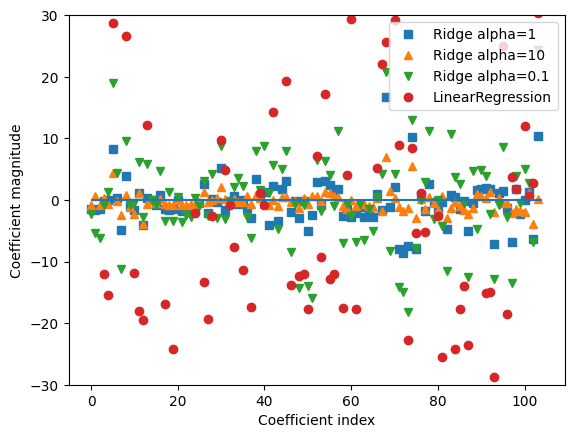

In [36]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-30, 30)
plt.legend()

Oś X oznacza wpisy coef_, gdzie x = 0 pokazuje współczynnik 1. cechy, x = 1 - współczynnik drugiej cechy, x = 100 - setnej itd. Oś Y oznacza zaś wartości liczbowe dla poszczególnych współczynników.

Innym sposobem zrozumienia wpływu regularyzacji na uczenie modelu jest ustalenie stałej wartości alpha i regulacja zasobu dostępnych danych treningowych. Wydzielmy więc część z zestawu danych uczących i oceńmy regresję liniową oraz grzbietową na stopniowo rosnących zbiorach. Uzyskamy w ten sposób tzw. krzywą uczenia - wykres przedstawiający wydajność modelu w miarę, jak zestaw uczący rośnie.

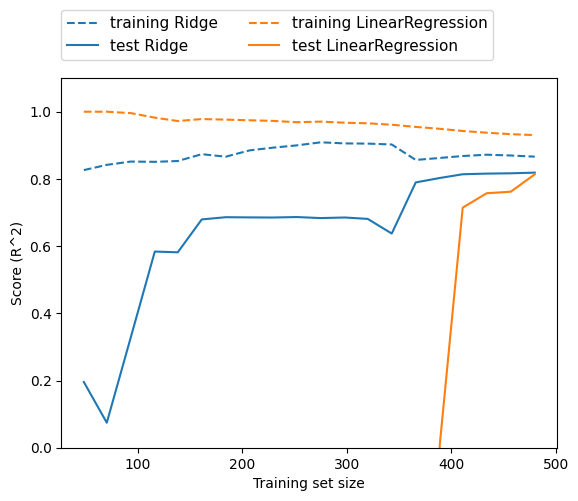

In [37]:
mglearn.plots.plot_ridge_n_samples()

Dla każdego rozmiaru zbioru treningowego wynik uczenia jest wyższy niż wynik testu. Ponieważ model Ridge jest uregulowany, wynik jego uczenia jest niższy niż wynik uczenia dla regresji liniowej. Jednak z drugiej strony model ten ma lepsze wyniki testu dla każdego rozmiaru zbioru. W miarę, jak rozmiar danych uczących rośnie, regresja liniowa dogania w uogólnianiu regresję grzbietową. Płynie z tego wniosek, że regularyzacja staje się tym mniej istotna, im większy rozmiar danych treningowych. Co też ciekawe, z tymże wzrostem maleje wydajność uczenia modelu regresji liniowej - im więcej danych, tym trudniej modelowi nadmiernie dopasować się do nich.

### Regresja Lasso.

Model alternatywny dla Ridge. Podobnie do niego, użycie go ogranicza współczynniki o bliskich zeru, jednakże poprzez wprowadzenie funkcji kary opartej na bezwględnych wartościach współczynników. Metoda ta może sprawiać, że współczynniki będą dokładnie zerowe, a więc je de facto eliminować. Posiadanie niektórych współczynników równych zeru może ułatwić interpretację modelu i uwypuklić jego najważniejsze cechy.

In [38]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

print(f"Training set score: {lasso.score(X_train, y_train)}")
print(f"Test set score: {lasso.score(X_test, y_test)}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.29323768991114607
Test set score: 0.20937503255272294
Number of features used: 4


Model Lasso z domyślnymi parametrami nie radzi sobie dobrze. Wydaje się być to powodem niedopasowania i użycia tylko 4 ze 105 cech. Podobnie jak w przypadku regresji Ridge, spróbujmy dopasować parametr alpha, który kontroluje odchylenie współczynników od 0 (domyślnie 1,0). Ustawiając go na inną wartość, zmieńmy również domyślne ustawienie parametru max_iter.

In [39]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {lasso001.score(X_train, y_train)}")
print(f"Test set score {lasso001.score(X_test, y_test)}")
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Training set score: 0.8962226511086497
Test set score 0.7656571174549982
Number of features used: 33


Niższy parametr alpha to bardziej złożony model z lepszym działaniem na danych testowych - używamy więcej cech, wydajność wzrosła.

Musimy jednak uważać - zbyt niski parametr alpha to de facto usunięcie efektu regularyzacji, co może poskutkować overfittingiem modelu, z wynikiem zbliżonym do regresji liniowej z domyślnymi parametrami.

In [40]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {lasso00001.score(X_train, y_train)}")
print(f"Test set score: {lasso00001.score(X_test, y_test)}")
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Training set score: 0.9507158754515463
Test set score: 0.6437467421272821
Number of features used: 96


Ponownie określmy współczynniki różnych modeli.

Text(0, 0.5, 'Coefficient magnitude')

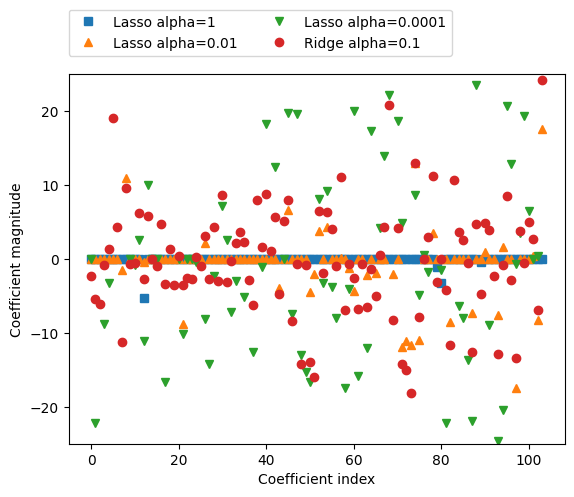

In [41]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Dla alpha=1 większość współczynników ma wartość równą 0, ale i pozostałe współczynniki są niewielkie. Im niższa wartość alpha, tym więcej współczynników różnych od zera. Najniższa wartość alpha to już model stosunkowo nieregularny, z dużymi wartościami współczynników. Model Ridge z wartością alpha=0,1 ma zbliżoną wydajność do Lasso z alpha=0,01, choć w przeciwieństwie do tego drugiego nie występują zerowe współczynniki.

W praktyce to regresja Ridge jest tą częściej stosowaną niż Lasso. Jednak przy dużej liczbie funkcji, spośród których dużo nie będzie brane pod uwagę, Lasso może być lepszym wyborem. Algorytm ten jest również łatwiejszy do interpretacji.

W bibliotece scikit-learn znajduje się również klasa ElasticNet, która łączy funkcje kary Lasso i Ridge. W praktyce to ta kombinacja może działać najlepiej, lecz wymaga dostosowania obu regularyzacji.

In [42]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet().fit(X_train, y_train)
print(f"Training set score: {elasticnet.score(X_train, y_train)}")
print(f"Test set score: {elasticnet.score(X_test, y_test)}")

Training set score: 0.32837814485847916
Test set score: 0.2217004367773664


In [43]:
elasticnet = ElasticNet(alpha=0.25).fit(X_train, y_train)
print(f"Training set score: {elasticnet.score(X_train, y_train)}")
print(f"Test set score: {elasticnet.score(X_test, y_test)}")

Training set score: 0.6164316708602853
Test set score: 0.44278536562061077


In [44]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {elasticnet.score(X_train, y_train)}")
print(f"Test set score: {elasticnet.score(X_test, y_test)}")

Training set score: 0.7029876989318095
Test set score: 0.5262167632204025


In [45]:
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.01, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {elasticnet.score(X_train, y_train)}")
print(f"Test set score: {elasticnet.score(X_test, y_test)}")

Training set score: 0.8354130942973717
Test set score: 0.6975708356955143


## Liniowe modele klasyfikacji.

Dla klasyfikacji binarnej ogólny wzór prognozowania przedstawia się następująco:

y_pred = w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b > 0

Zamiast jednak zwracać ważoną sumę cech, ustalamy wartość predykowaną na 0; jeżeli funkcja przyjmuje wartość mniejszą od zera, prognozujemy klasę -1, a jeżeli większą od 0 - klasę +1. Jest to wspólna zasada dla wszystkich modeli liniowych do klasyfikacji.

O ile wynik dla liniowych modeli regresji jest liniową funkcją cech (linia, płaszczyzna, hiperpłaszczyzna przy wyższych wymiarach), o tyle dla klasyfikacji liniowa funkcja danych wejściowych jest granicą decyzyjną, za pomocą której klasyfikator oddziela klasy od siebie.

Algorytmy uczenia modeli liniowych różnią się przede wszystkim sposobem mierzenia, jak dana kombinacja współczynników w i punkt przecięcia b pasują do danych treningowych, a także używanym rodzajem regularyzacji.

Różne algorytmy różnie mierzą "dobre dopasowanie do danych uczących". Nie jest jednak możliwe takie dostosowanie w i b, aby zminimalizować błędne klasyfikacje generowane przez algorytmy.

Najpopularniejsze modele liniowe do klasyfikacji: regresja logistyczna i liniowe maszyny wektorów nośnych. Zastosujmy je do zestawu danych forge i zwizualizujmy granicę decyzyjną.

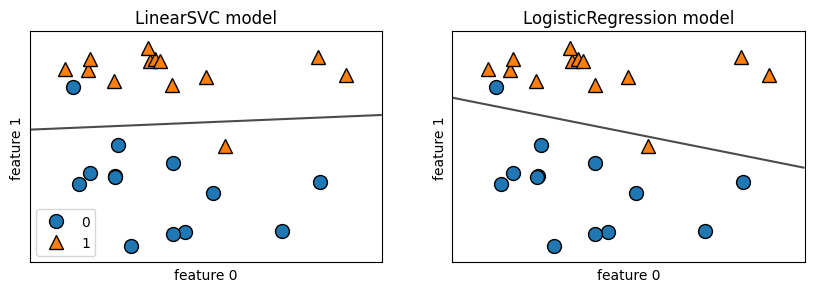

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__} model")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

Dla ww. zestawu danych oś X to cecha 0, oś Y - cecha 1. Wyświetlamy granice decyzyjne jako linie proste, oddzielające od siebie próbki danych, dla których algorytmy przypisały klasę 0 lub 1. Oba modele mają podobne granice decyzyjne; to, co powyżej linii, jest dla nich klasą 1, poniżej zaś klasą 0.

Oba modele mają parametr C, odwrotność siły regularyzacji. Im wyższa jego wartość, tym niższa regularyzacja - innymi słowy, model z wysoką wartością parametru C dopasowuje się w większym stopniu do danych treningowych, zaś przy niższych wartościach model dąży do znalezienia takiego wektora współczynników, który jest bliski 0. Użycie niższych wartości C spowoduje, że algorytm próbuje się dopasować do większości punktów danych, z kolei zastosowanie wyższej wartości sprawia, że model próbuje się dopasować do każdego punktu danych.

Poniżej działanie parametru C dla liniowego SVC. Po lewej stronie mamy niską wartość parametru, więc i dużą regularyzację. Większość punktów klasy 0 mamy w górnej części wykresu (a więc 1 w dolnej), a linia jest niemalże pozioma. Im wyższa wartość parametru, tym bliżej pionowej linii, a model skupia się bardziej na próbkach błędnie sklasyfikowanych z lewej strony.

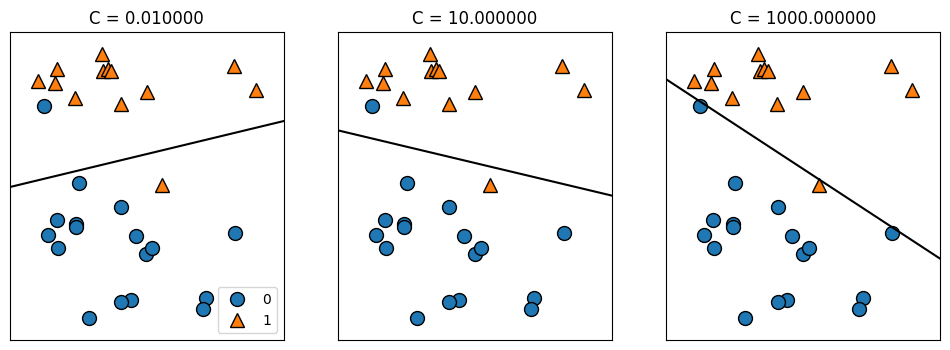

In [47]:
mglearn.plots.plot_linear_svc_regularization()

Jakkolwiek model z prawej strony klasyfikuje najlepiej, tak może nie oddawać ogólnego podziału klas - a więc prawdopodobnie jest przeuczony.

Przeanalizujmy model regresji logistycznej w zestawie cancer.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {logreg.score(X_train, y_train)}")
print(f"Test set score: {logreg.score(X_test, y_test)}")

Training set score: 0.9671361502347418
Test set score: 0.9370629370629371


Domyślna wartość parametru C (równa 1) zapewnia dobre wyniki, ok. 0,97 dokładności dla uczenia i 0,94 dla testu. Dla porównania zwiększmy C do poziomu 10.

In [49]:
logreg10 = LogisticRegression(C=10, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {logreg10.score(X_train, y_train)}")
print(f"Test set score: {logreg10.score(X_test, y_test)}")

Training set score: 0.9788732394366197
Test set score: 0.9300699300699301


Wzrosła wydajność uczenia, jednak wynik na zbiorze testowym zmalał. Sprawdźmy więc, co się stanie, gdy obniżymy C do poziomu 0,1.

In [50]:
logreg01 = LogisticRegression(C=0.1, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {logreg01.score(X_train, y_train)}")
print(f"Test set score: {logreg01.score(X_test, y_test)}")

Training set score: 0.9577464788732394
Test set score: 0.9370629370629371


Wynik na zbiorze testowym nie uległ zmianie, nieco spadła wydajność uczenia. Obniżmy jeszcze współczynnik C do poziomu 0,01.

In [51]:
logreg001 = LogisticRegression(C=0.01, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {logreg001.score(X_train, y_train)}")
print(f"Test set score: {logreg001.score(X_test, y_test)}")

Training set score: 0.9553990610328639
Test set score: 0.951048951048951


Najbardziej zregularyzowany model okazał się mieć najwyższą dokładność w zbiorze testowym, choć przy nieco niższej wydajności uczenia. Jego zdolność generalizacji jest najwyższa.

Wykres współczynników cech dla różnych wartości C potwierdza, że im wyższy parametr C, tym bardziej odbiegające od 0 współczynniki.

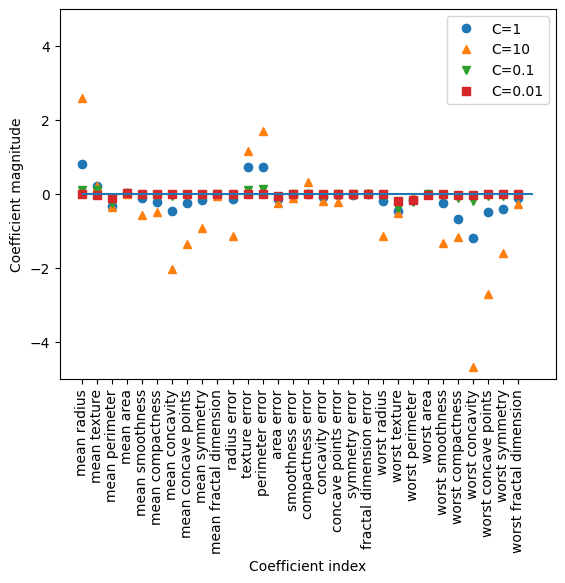

In [52]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg10.coef_.T, '^', label="C=10")
plt.plot(logreg01.coef_.T, 'v', label="C=0.1")
plt.plot(logreg001.coef_.T, 's', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Co istotne - regresja logistyczna domyślnie używa regularyzacji L2 (Ridge). Wartości współczynników zbliżają się więc do 0, jednak nigdy go nie osiągają. Zawartość wykresu pozwala nam również na zidentyfikowanie cech, które dla modelu z najniższą regularyzacją (najwyższym C) mają największe znaczenie.

Łatwiejszy do interpretacji może być model z regularyzacją L1, ponieważ ogranicza ona model do skorzystania ledwie z kilku cech.

Training accuracy of l1 logreg with C=0.001: 0.92018779342723
Test accuracy of l1 logreg with C=0.001: 0.9230769230769231
Training accuracy of l1 logreg with C=1: 0.9694835680751174
Test accuracy of l1 logreg with C=1: 0.9370629370629371
Training accuracy of l1 logreg with C=100: 0.9929577464788732
Test accuracy of l1 logreg with C=100: 0.9370629370629371


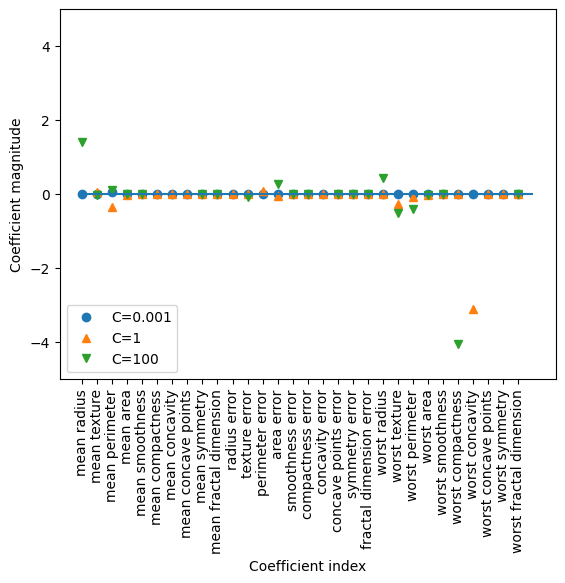

In [53]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear', max_iter=100000).fit(X_train, y_train)
    print(f"Training accuracy of l1 logreg with C={C}: {lr_l1.score(X_train, y_train)}")
    print(f"Test accuracy of l1 logreg with C={C}: {lr_l1.score(X_test, y_test)}")
    plt.plot(lr_l1.coef_.T, marker, label=f"C={C}")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

W przypadku zastosowania modeli liniowych do klasyfikacji wieloklasowej powszechna technika to 1 vs rest (jeden kontra reszta). Model binarny uczony jest dla każdej klasy w ten sposób, aby nauczyć się je odróżniać, a więc powstaje tyle modeli binarnych, ile klas. Klasyfikator z najwyższym wynikiem
w pojedynczej klasie "wygrywa", a etykieta tegoż jest zwracana jako prognoza. Dzieje się tak, bowiem modele liniowe często służą wyłącznie klasyfikacji binarnej i nie obejmują naturalnie przypadków wieloklasowych.

Posiadanie jednego klasyfikatora binarnego na klasę skutkuje posiadaniem jednego wektora współczynników w i punktu przecięcia b na klasę.

Zastosujmy metodę powyższą do prostej klasyfikacji trzech klas - zestaw **make_blobs**.

Coefficient shape: (3, 2)
Intercept shape: (3,)


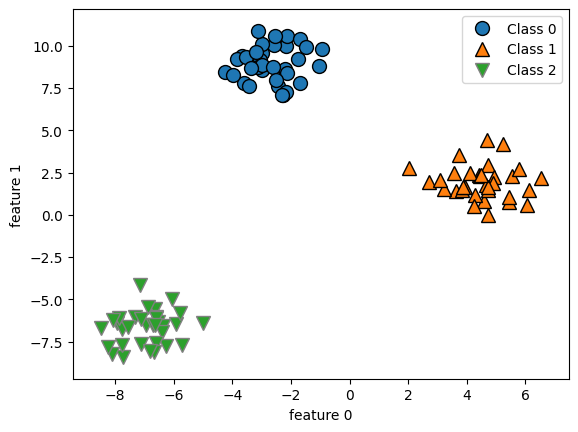

In [54]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)

linear_svm = LinearSVC().fit(X, y)
print(f"Coefficient shape: {linear_svm.coef_.shape}")
print(f"Intercept shape: {linear_svm.intercept_.shape}")

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

Kształt atrybutu coef_ wskazuje na to, że każdy jego wiersz zawiera wektor współczynników dla jednej z trzech klas, a każda kolumna zawiera wartość współczynnika dla określonej cechy (jednej z dwóch w zestawie danych). Atrybut intercept_ przechowuje z kolei jednowymiarową tablicę, w której znajdują się punkty przecięcia dla każdej klasy.

Teraz wykreślmy linie dla trzech klasyfikatorów binarnych. Wszystkie linie z klasy 0 są powyżej linii dla niej przypisanej, więc są po stronie swojej klasy, a także po lewej stronie linii dla klasy 1 i powyżej linii dla klasy 2, więc klasyfikowane są jako "reszta". W ten sposób możemy przeanalizować każdą z klas. Trójkąt pośrodku jest sklasyfikowany przez wszystkie trzy klasyfikatory jako "reszta"; punkt tam się znajdujący był przypisany do klasy najbliższej linii.

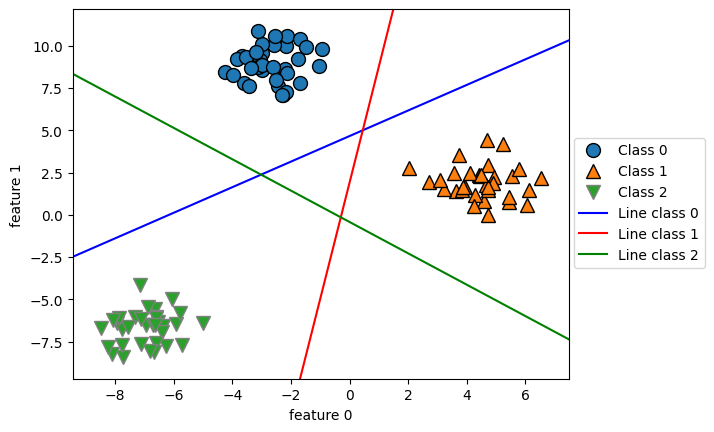

In [55]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

Poniżej wykreślamy prognozy dla całego obszaru przestrzeni 2D.

Text(0, 0.5, 'feature 1')

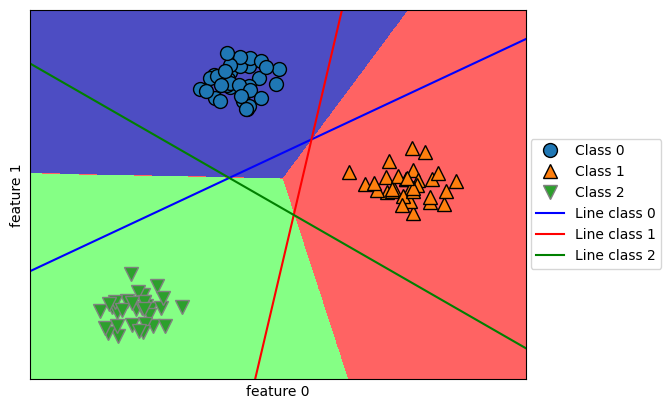

In [56]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend( ["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))
plt.xlabel("feature 0")
plt.ylabel("feature 1")

## Podsumowanie.

Głównym parametrem modeli liniowych jest regularyzacja (alpha w modelach regresji, C w modelach klasyfikacji). Duże wartości alpha lub małe C oznaczają proste modele. Wyróżniamy dwa rodzaje tejże: L1, która pomija część cech i jest łatwo interpretowalna, ale może skutkować niedopasowaniem, oraz L2, która może ograniczać współczynniki do niskich wartości, ale niezerowych.

Modele te szybko da się wyuczyć, dobrze pracują na zestawach dużych, a także rzadkich. Przy użyciu wzorów matematycznych wskazanych wcześniej można stosunkowo łatwo zrozumieć, jak tworzone są prognozy. Problem interpretacyjny może się pojawić, jeżeli cechy zestawu danych są wysoce skorelowane.

Modele liniowe pracują dobrze, gdy liczba cech w porównaniu z liczbą próbek jest duża. Są również często używane w bardzo dużych zbiorach danych, gdy uczenie innych modeli jest niemożliwe.

# Modele klasyfikacyjne Bayesa.

Modele te są oparte na twierdzeniu Bayesa, zapewniają również większą szybkość w uczeniu od modeli liniowych (jednak gorsza jest ich wydajność generalizacji). Wynika to z faktu, że modele uczą się parametrów, biorąc pod uwagę każdą funkcję osobno i zbierając dla każdej klasy z każdej funkcji proste statystyki.

Wyróżniamy trzy najpopularniejsze modele klasyfikacji:
- GaussianNB - stosujemy do dowolnych danych ciągłych,
- BernoulliNB - stosujemy do danych binarnych,
- MultinomialNB - przyjmuje dane zliczeniowe, tj., że każda cecha reprezentuje jakąś liczbę całkowitą.

Dwa ostatnie modele są dość często wykorzystywane do klasyfikacji tekstu.

Jak działa BernoulliNB? Najłatwiej pojąć to przy pomocy przykładu poniżej. Mamy cztery punkty danych o klasach 0 i 1 oraz czterech cechach binarnych. Klasa 0 to punkt pierwszy i trzeci, a klasa 1 drugi i czwarty. Kod sumuje wartości wg kolumn, odzwierciedlając tym samym częstotliwość wystąpień wartości cechy = 1 dla każdej klasy. Jest to zatem prosta metoda zliczenia, jak często w danej klasie występuje dana cecha, a następnie stworzenia na tej podstawie prognozy.

In [57]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print(f"Feature counts:\n{counts}")

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


GaussianNB i MultinomialNB różnią się nieco pod względem rodzajów statystyk, które są przez nie obliczane. Ten pierwszy przechowuje średnią wartość i odchylenie standardowe każdej cechy dla każdej klasy, ten drugi zaś uwzględnia tylko średnią.

Predykcja tych modeli polega na tym, że do każdej z klas porównujemy punkt danych (pod względem przedstawianych przezeń statystyk), a wynikiem prognozy jest najlepiej pasująca klasa.

## Podsumowanie.

Modele MultinomialNB i BernoulliNB posiadają parametr alpha, kontrolujący złożoność modelu poprzez dodanie do danych wielu wirtualnych punktów danych o dodatnich wartości dla wszystkich funkcji, przez co statystyki są "wygładzone". Im większa wartość parametru, tym większe wygładzenie i mniej złożony model. Jednakowoż wydajność algorytmu jest stosunkowo odporna na ustawienie tego parametru, więc jakikolwiek wpływ na dokładność jest niewielki.

Model GaussianNB używamy najczęściej dla danych o dużych wymiarach. Pozostałe dwa częściej stosuje się dla rzadkich danych zliczeniowych, np. tekstu.

Modele te uczą się i prognozują szybko, a procedura uczenia jest prosta do zrozumienia, działają one dobrze z danymi wysokowymiarowymi i rzadkimi, są również stosunkowo odporne na dostrajanie parametrów. Są to również bardzo dobre modele bazowe, gdy dysponujemy dużym wolumenem danych, a uczenie modelu - nawet liniowego - może pochłonąć dużo czasu.

# Drzewa decyzyjne.

Szeroko stosowane algorytmy, które uczą się hierarchii pytań typu "jeżeli/to", co prowadzi do podjęcia decyzji.

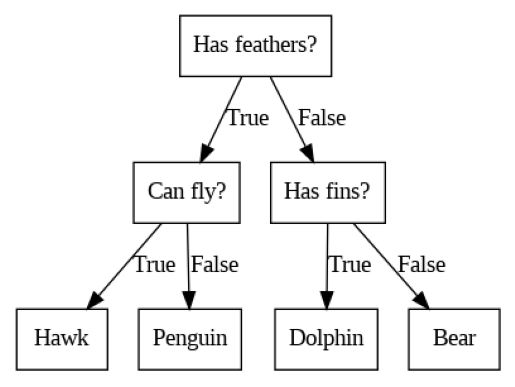

In [58]:
mglearn.plots.plot_animal_tree()

Na powyższej ilustracji stworzyliśmy przykładową serię pytań w postaci drzewa decyzyjnego. Każdy węzeł drzewa przedstawia pytanie lub jest węzłem końcowym (liściem) zawierającym odpowiedź. Krawędzie łączą odpowiedzi na pytanie z następnym pytanie, które należy zadać.

## Budowanie drzewa.

Uczenie drzewa polega na nauczeniu go takiej sekwencji pytań "jeżeli/to", dzięki której zwróci prawidłową odpowiedź najszybciej. W machine learningu nazywamy te pytania testami. Ponieważ najczęściej dane nie są dostarczane w formie cech binarnych, tylko danych ciągłych, testy mają najczęściej postać pytań typu "czy wartość cechy i jest większa niż wartość a?".

Najpierw algorytm przeszukuje wszystkie możliwe testy i znajduje ten zawierający największą liczbę informacji o zmiennej docelowej. Najwyższy węzeł - korzeń - reprezentuje wszystkie dane w zestawie; podział wykonywany jest przez sprawdzenie, czy punkt spełnia warunek wynikający z pytania - np. czy x[1] >= 0,5. Od odpowiedzi zależy przypisanie punktu do węzła. W klasyfikacji, jeżeli ten podział nie wyczerpuje podziału - np. jeżeli w węźle pozostają próbki różnych klas - można dokonać kolejnego testu. Taki rekurencyjny proces tworzy binarne drzewo decyzji, z testem w każdym węźle.

Partycjonowanie danych jest powtarzane tak długo, aż każdy region w partycji zawiera tylko jedną wartość docelową - pojedynczą klasę lub wartość regresji. Liść, który zawiera punkty danych o tej samej wartości docelowej, nazywamy liściem czystym.

Prognozowanie nowego punktu polega na sprawdzeniu, w którym regionie podziału przestrzeni cech znajduje się punkt, a następnie prognozowaniu celu większości punktów (lub pojedynczego celu dla czystego liścia) w regionie. Region można znaleźć, przechodząc przez drzewo od korzenia i idąc w lewo lub prawo, w zależności od odpowiedzi na pytanie z węzła.

W ten sam sposób używamy drzewa do zadań regresji. Przeszukujemy drzewo na podstawie testów każdego węzła i znajdujemy liść, w który wpada nowy punkt; dane wyjściowe dla tego punktu to średni cel punktów uczących w tym liściu.

## Kontrolowanie złożoności drzew decyzyjnych.

Budowanie drzewa w opisany wyżej sposób, tj. kontynuowanie, dopóki liście nie staną się czyste, może prowadzić do modeli, które są bardzo złożone i dopasowane do danych uczących. Obecność czystych liści w drzewie oznacza, że drzewo jest w 100% dokładne dla zbioru treningowego.

Istnieją dwie powszechne strategie zapobiegania przeuczeniu:
- przycinanie wstępne -  wczesne zatrzymywanie tworzenia drzew, poprzez ograniczenie maksymalnej głębokości drzewa, maksymalnej liczby liści lub wymaganej liczby liści w węźle niezbędnej do dalszego podziału,
- przycinanie późniejsze - budowanie na początku mocno dopasowanego drzewa po to, by dalej móc przycinać gałęzie lub zwijać węzły zawierające niewiele informacji.

Biblioteka scikit-learn realizuje tylko przycinanie wstępne.

In [59]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train)}")
print(f"Accuracy on test set: {tree.score(X_test, y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.9370629370629371


Model dopasował się idealnie do zbioru uczącego, ponieważ liście są czyste, drzewo było na tyle głębokie, że doskonale zapamiętało wszystkie etykiety danych uczących. Dokładność dla zbioru testowego okazała się jednak już nie tak wysoka - poniżej 0,94, a więc niżej niż regularyzowany model regresji logistycznej.

Brak ograniczenia głębokości drzewa może skutkować tym, że stanie się dowolnie złożone i głębokie, a co za tym idzie, podatne na nadmierne dopasowanie i nie uogólniające dostatecznie dobrze. Najprostsza technika wstępnego przycinania to ustawienie takiego parametru max_depth, który zatrzyma rozwijanie drzewa, zanim dopasuje się idealnie do danych uczących. Może to poskutkować niższą dokładnością w zbiorze treningowym, ale lepszą w zbiorze testowym. Tak też ma miejsce w poniższym przypadku.

In [60]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train)}")
print(f"Accuracy on test set: {tree.score(X_test, y_test)}")

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.951048951048951


## Analiza drzew decyzyjnych.

Stwórzmy graficzną postać drzewa. Najpierw zapiszemy drzewo w formacie tekstowym .dot, ustawiając przy tym opcję kolorowania węzłów w celu odzwierciedlenia większości klas w węźle oraz przekazując nazwy klas i cech. Dalej odczytujemy plik i generujemy jego wizualizację przy pomocy biblioteki graphviz.

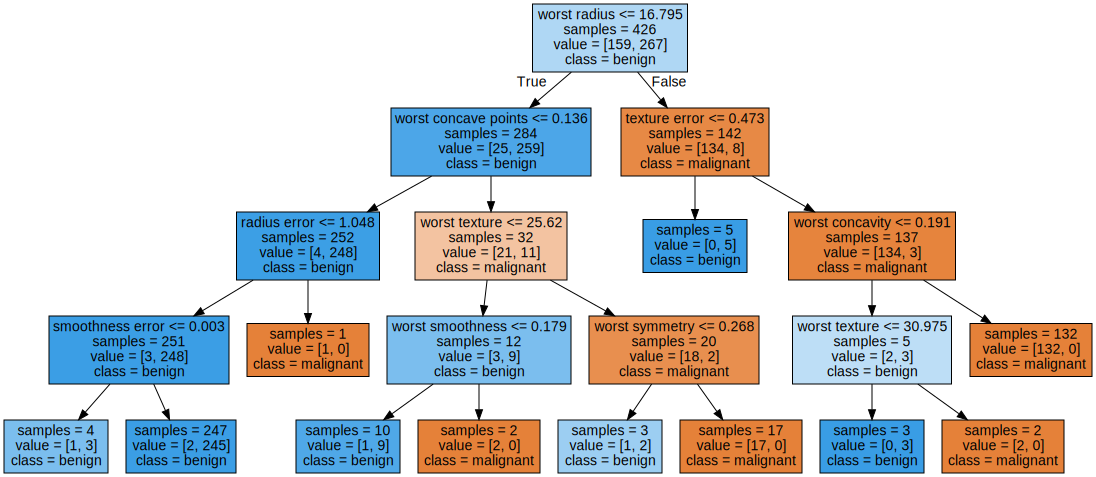

In [61]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

W ten sposób uzyskaliśmy doskonały obraz tego, jak algorytm tworzy prognozy. Głębsze drzewa mogą być jednak trudniejsze do zobrazowania, dlatego pomocne może być ustalenie, którą ścieżkę obieramy przy klasyfkacji większości danych. Parametr samples oznacza liczbę próbek w węźle, a wartość parametru value oznacza liczbę próbek na klasę. U góry (w korzeniu) drzewa znajdziemy cechę, która zapewnia najbardziej ogólny podział próbek - jest nią worst radius.

## Ważność cech w drzewach.

Bardzo istotną właściwością drzew decyzyjnych jest ważność cech, określająca, jak ważna jest każda cecha dla decyzji, którą podejmuje drzewo. Są to liczby z przedziału 0-1, gdzie 0 oznacza "cecha w ogóle nieistotna", a 1 "cecha doskonale prognozująca cel", a ważności wszystkich cech zawsze sumują się do 1.

In [62]:
print(f"Feature importances:\n{tree.feature_importances_}")

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


Przedstawienie ważności cech w formie tablicy niewiele nam powie, jeżeli nie spojrzymy na ich wizualizację w formie wykresu słupkowego. Wyraźnie widać, że największą ważność przejawia cecha znajdująca się w korzeniu drzewa, bo najlepiej oddziela obie klasy. Ogólnie wartości niezerowe przedstawiają cechy wykorzystane przy tworzeniu drzewa, przy czym wartości są tym większe, im bliżej korzenia. To, że cecha przedstawia wartość niską, nie oznacza, że nie jest w ogóle ważna dla modelu, a to, że inna przechowuje te same informacje.

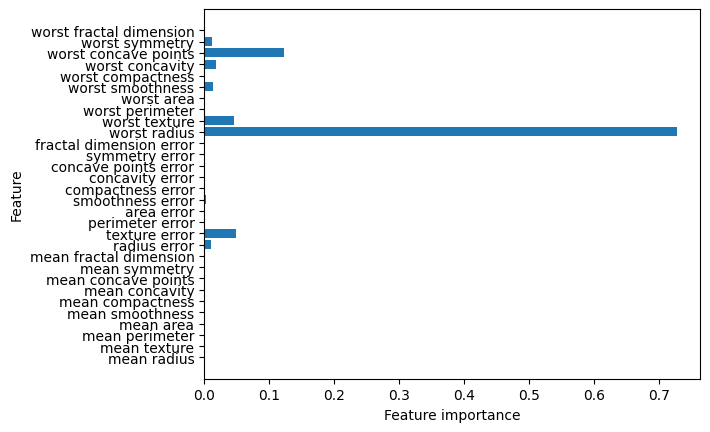

In [63]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

W przeciwieństwie do współczynników w modelach liniowych, ważność cech w drzewach decyzyjnych nigdy nie jest ujema i nie przechowuje informacji o tym, którą klasę wskazuje cecha. Wskazuje ona na to, że cecha jest istotna, ale nie komunikuje, czy jej duża wartość wskazuje definitywnie na klasę próbki.

W rzeczywistości zależności klasy od cechy takie, jak w poniższym przykładzie, występują rzadko. Na wykresie tym przedstawiono zestaw danych z dwiema cechami i tyloma klasami. Wszystkie informacje przechowuje jedna cecha, x[1], zaś x[0] jest w ogóle nieużywane. Relacja między x[1], a klasą nie jest jednak monotonna, nie możemy powiedzieć, że duża wartość x[0] oznacza klasę 0, a mała - klasę 1 lub odwrotnie.

Feature importances: [0. 1.]


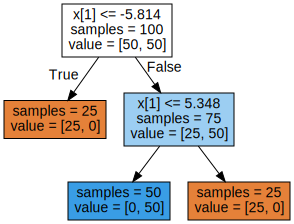

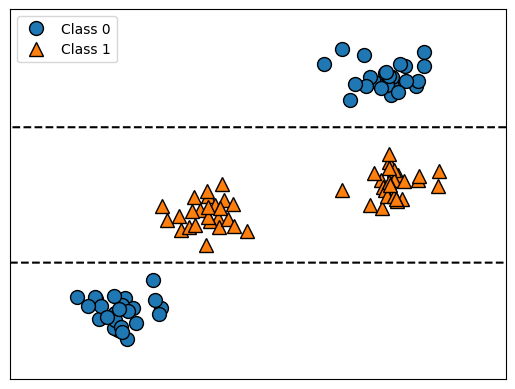

In [64]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Podobnie do drzew dla klasyfikacji implementujemy drzewa dla regresji. Szczególną właściwą wszystkich drzew decyzyjnych jest to, że takie drzewo nie jest w stanie ekstrapolować ani prognozować poza zakresem danych uczących. Przyjrzyjmy się temu na przykładzie zbioru danych dot. historycznych cech pamięci RAM komputerów.

Text(0, 0.5, 'Price in $/Mbyte')

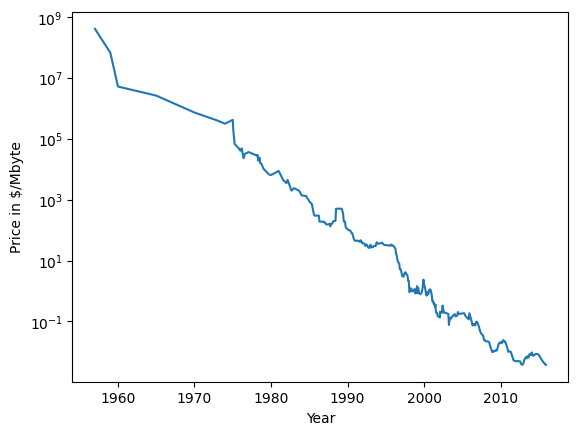

In [65]:
import pandas as pd
ram_prices = pd.read_csv("https://raw.githubusercontent.com/amueller/introduction_to_ml_with_python/refs/heads/main/data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

Skala osi Y jest logarytmiczna, przy takowe relacja wydaje się być niemal liniowa, a więc może być łatwa do prognozowania.

Sporządźmy prognozę na lata po 2000 r., porównując regresję drzewa decyzyjnego i liniową. Przeskalujmy ceny za pomocą logarytmu, aby stworzyć względnie liniową zależność (ma to duże znaczenie dla modelu regresji liniowej, dla drzewa decyzyjnego pozostaje indyferentne). Po wyuczeniu modeli i prognozowaniu stosujemy mapę wykładniczą dla cofnięcia transformacji logarytmicznej.

In [66]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

y_train = np.log(data_train.price)
X_train = data_train.date.to_numpy()[:, np.newaxis]

y_test = np.log(data_test.price)
X_test = data_test.date.to_numpy()[:, np.newaxis]

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Następnie porównajmy wizualnie prognozy obu modeli z prawdą.

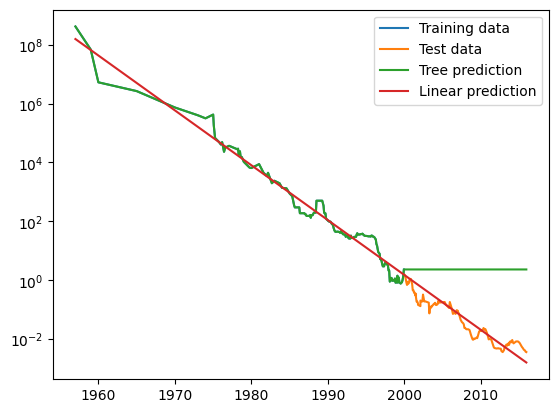

In [67]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

Różnica jest uderzająca. Model liniowy przybliża dane za pomocą linii, która zapewnia całkiem dobrą prognozę dla danych testowych, wychwytując jednocześnie drobniejsze różnice w obu zbiorach sanych. W tym samym czasie model drzewa decyzyjnego doskonale nauczył się danych treningowych, jednak po opuszczeniu zakresu danych testowych prognozuje po prostu ostatni znany mu punkt.

(Nie oznacza to, że drzewa nie nadają się do tworzenia dobrych prognoz szeregów czasowych, chodziło tu ilustrację określonej właściwości sposobu tworzenia prognoz)

## Podsumowanie.

Głównym sposobem przeciwdziałania złożoności modelu są parametry wstępnego przycinania, które zatrzymują budowanie drzewa przed jego pełnym opracowaniem: max_depth, max_leaf_nodes, min_samples_leaf.

Główne zalety drzew decyzyjnych to: łatwość wizualizacji i interpretacji, nawet dla laików, oraz niezmienność algorytmu, niezależnie od ilości danych. W przypadku tych algorytmów każda cecha przetwarzana jest osobno, nie jest więc potrzebne wstępne przetwarzanie danych, jak skalowanie. Dobrze działają one w przypadku cech różnej skali lub stanowią mieszankę funkcji binarnych i ciągłych.

Z drugiej stony, nawet przy wstępnym przycinaniu drzewa decyzyjne mają tendencję do overfittingu i słabej wydajności prognoz. W większości przypadków, zamiast korzystać z pojedynczych drzew, wykorzystywane są metody zespołowe.

# Zespoły drzew decyzyjnych.

Zespół jest ogólnie metodą łączenia wielu modeli uczenia maszynowego dla stworzenia jednego, bardziej zaawansowanego. Najbardziej rozpowszechnione i skuteczne wykorzystują jako elementy składowe drzewa decyzyjne; są to lasy losowe i drzewa decyzyjne z gradientem.

## Lasy losowe.

Idea stojąca za tym modelem polega na tym, że każde drzewo może stosunkowo dobrze prognozować, ale prawdopodobnie będzie się nadmiernie dopasowywać do danych. Dla zmniejszenia nadmiernego dopasowania można zbudować wiele drzew, na różny sposób nadmiernie dopasowanych, i uśrednić ich wyniki.

Każde drzewo z lasu losowego powinno prognozować w sposób zadowalający i różnić się od innych drzew. Człon "losowy" w nazwie algorytmu bierze się stąd, że każde drzewo zawiera elementy losowe w postaci wyboru punktów danych do budowy drzewa i wyboru cech w każdym teście podziału.

Aby taki las zbudować, decydujemy o liczbie drzew w lesie. Drzewa te są budowane zupełnie niezależnie od siebie, a algorytm, aby upewnić się o ich różności, dokona dla każdego z nich losowych wyborów. Do drzew bierzemy próbkę bootstrap danych, a więc losujemy wielokrotnie próbki danych bez ich usuwania z zestawu (jedna próbka może być wylosowana wiele razy). Taki zestaw danych będzie tak duży, jak oryginalny, ale niektórych próbek w nim brakuje, a niektóre będą powtórzone.

Na podstawie takiego zestawu buduje się drzewo decyzyjne, jednak algorytm jest nieco zmodyfikowany. Zamiast szukać najlepszego testu dla poszczególnych węzłów, algorytm losowo wybiera podzbiór cech i szuka najlepszego możliwego testu obejmującego jedną z nich. Ten wybór podzbioru jest powtarzany oddzielnie w każdym węźle.

Tym samym każde drzewo jest budowane na nieco innym zestawie danych. Ze względu na wybór cech w poszczególnym węźle, każdy podział danych działa na innym ich podzbiorze. Kluczowym parametrem tego procesu jest max_features; ustawienie go na wysoką wartość spowoduje, że drzewa będą do siebie bardzo podobne i będą się łatwo dopasowywać do danych wg najbardziej charakterystycznych cech, ale gdy wartość parametru będzie niska, drzewa w lesie będą całkowicie inne i każde z nich musiałoby być bardzo głębokie, żeby być przeuczone.

Prognoza:
- w regresji - uśrednienie wyników drzew w zespole,
- w klasyfikacji - "miękkie głosowanie" - każdy algorytm wykonuje "miękką" prognozę, podając prawdopodobieństwo etykiety wyjściowej, następnie prawdopodobieństwa zwrócone przez wszystkie drzewa są uśredniane, a wynikiem prognozowania jest klasa o najwyższym prawdopodobieństwie.

Stwórzmy las z pięcioma drzewami i zastosujmy go do zestawu danych two_moons.

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

Drzewa zbudowane jako część lasu przechowywane są w atrybucie estimator_. Poniżej przedstawiona jest wizualizacja granic decyzyjnych każdego drzewa, wraz z ich zagregowaną prognozą.

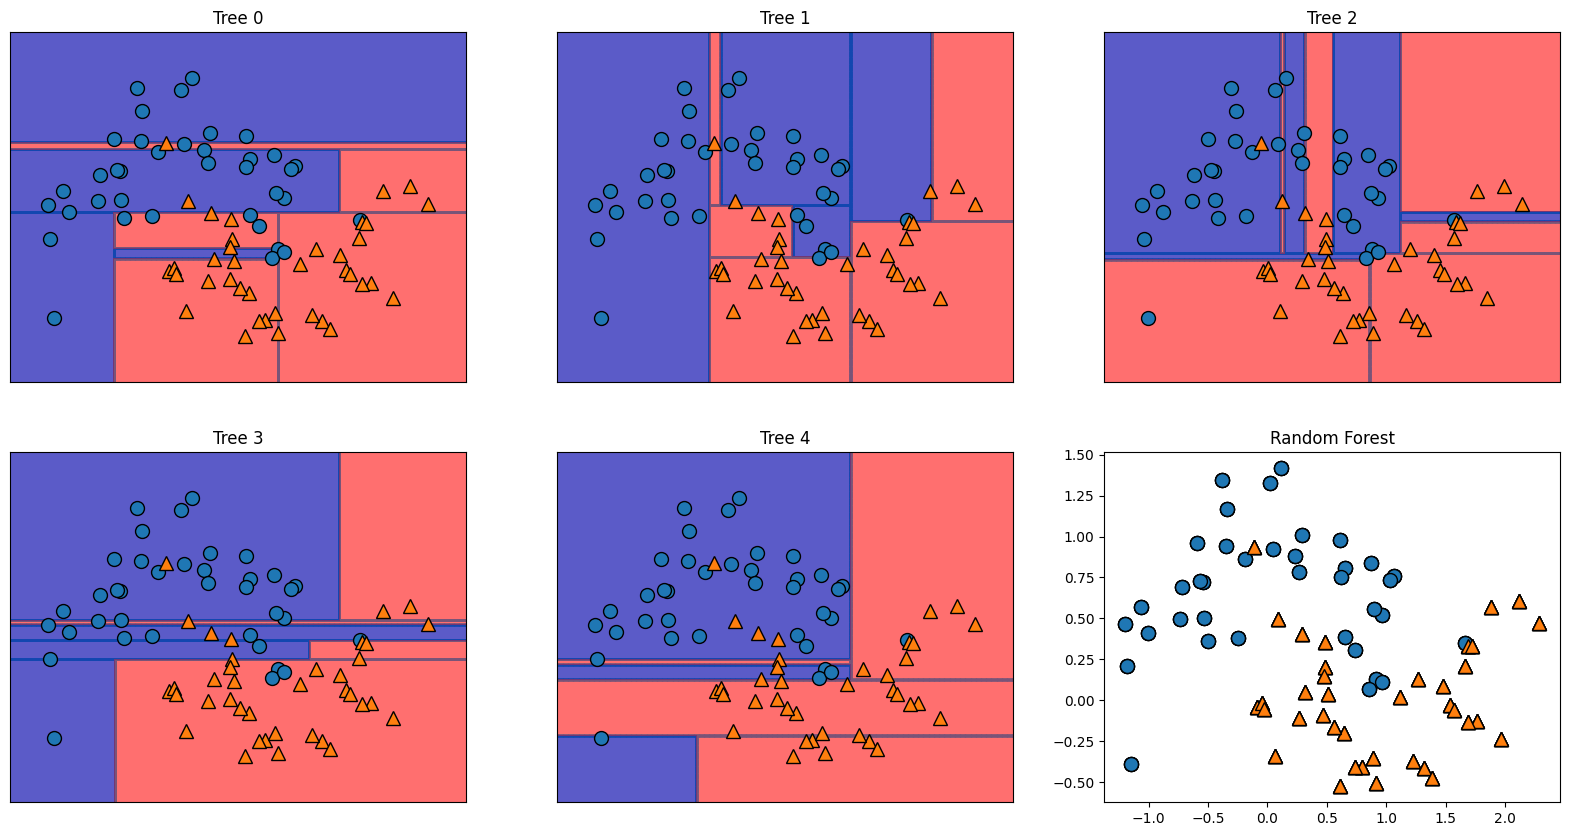

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(tree, X_train, fill=True, ax=ax, alpha=.4)
    axes[-1, -1].set_title("Random Forest")
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Granice decyzyjne drzew są bardzo różne. Ze względu na bootstrap niektóre z wykreślonych punktów danych uczących nie zostały uwzględnione w zestawach uczących drzew, więc drzewa mylą się co do nich. Las losowy dopasowuje się w mniejszym stopniu niż jakiekolwiek drzewo z osobna, jednak w prawdziwym przykładzie zastosowalibyśmy znacznie większy zespół, co doprowadziłoby do gładszych granic.

W kolejnym przykładzie do zestawu cancer zastosujemy las losowy ze 100 drzewami.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print(f"Accuracy on training set: {forest.score(X_train, y_train)}")
print(f"Accuracy on test set: {forest.score(X_test, y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.972027972027972


Las losowy bez dostrajania dał nam dokładność ok. 0,97, więc wyższą od modeli liniowych czy pojedynczego drzewa. Można oczywiście zastosować wstępne przycinanie, dostosować max_features, ale i domyślne parametry lasu działają już dość dobrze.

Las losowy również dostarcza nam wartości ważności cech, obliczane przez agregację ważności cech na drzewach w lesie. Zwykle dla lasów losowych jest ona bardziej wiarygodna niż dla pojedynczych drzew. Na poniższym przykładzie każda z cech ma niezerwową wartość ważności, co ciekawe, najważniejszą jest dla lasu cecha "worst perimeter", a więc inna niż dla pojedynczego drzewa. Losowość w budowaniu lasu zmusza algorytm do rozważenia większej liczby możliwych wyjaśnień, wobec czego las losowy przedstawia szerszy obraz danych niż pojedyncze drzewo.

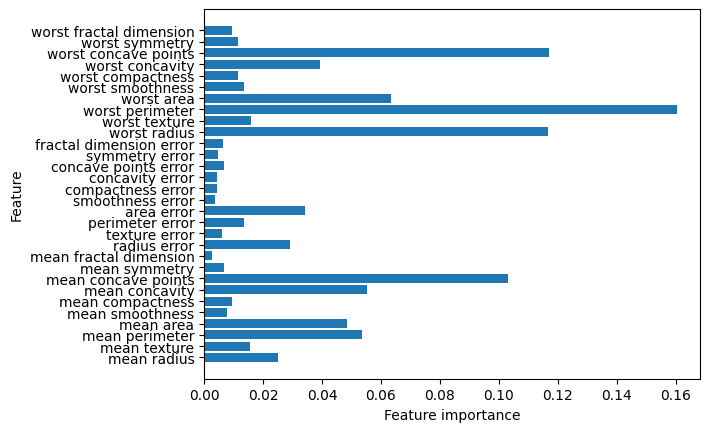

In [71]:
plot_feature_importances_cancer(forest)

Lasy losowe są często wykorzystywane jako algorytm wydajny, niewymagający większego strojenia czy skalowania danych. Mają one wszystkie zalety drzew decyzyjnych, a przy tym są naturalnie losowe. Z drugiej jednak strony, nie radzą sobie zbyt dobrze z danymi rzadkimi o bardzo wielu wymiarach (np. tekstowymi), są też trudniejsze w interpretacji niż drzewa decyzyjne. Ważne parametry: n_estimators (liczba drzew w lesie), max_features (maksymalna liczba cech wykorzystywana w pojedynczym drzewie), max_depth (maksymalna głębokość), max_leaf_nodes (maksymalna liczba liści, jaką może mieć pojedyncze drzewo).

## Drzewa regresji ze wzmocnieniem gradientowym.

Wbrew nazwie, modele te mogą służyć zarówno do regresji, jak i klasyfikacji. Ta metoda polega na budowaniu drzew w sposób seryjny, w którym każde drzewo stara się poprawić błędy poprzedniego. Domyślnie w drzewach tych nie stosuje się losowości, a używane jest silne przycinanie wstępne; drzewa wzmocnione gradientowo są płytkie (max_depth <= 5), co powoduje, że model jest szybszy i zajmuje mniej pamięci.

Główna idea - budowa prostego drzewa i iteracyjna poprawa wydajności przez dodawanie kolejnych drzew. Ważny parametr (oprócz typowo stosowanych dla wstępnego przycinania i ustalenia liczby estymatorów) to learning_rate, który kontroluje, jak bardzo każde kolejne drzewo próbuje poprawić wynik poprzedniego. Wyższy wskaźnik = bardziej złożony model, gdyż każde drzewo może wprowadzać silniejsze poprawki. Dodanie również większej liczby drzew pozwala zwiększyć złożoność modelu. Modele te są szeroko stosowane, również w pracach konkursów uczenia maszynowego.

Zaimplementujmy ten model dla zbioru cancer.

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print(f"Accuracy on training set: {gbrt.score(X_train, y_train)}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.965034965034965


Model wykazuje stuprocentową dokładność w zbiorze treningowym. Aby zmniejszyć ewentualne nadmierne dopasowanie, możemy zastosować silniejsze przycinanie wstępne (domyślnie max_depth=3)...

In [73]:
gbrt1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt1.fit(X_train, y_train)
print(f"Accuracy on training set: {gbrt1.score(X_train, y_train)}")
print(f"Accuracy on test set: {gbrt1.score(X_test, y_test)}")

Accuracy on training set: 0.9906103286384976
Accuracy on test set: 0.972027972027972


...lub obniżyć szybkość uczenia (domyślnie learning_rate=0.1).

In [74]:
gbrt2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt2.fit(X_train, y_train)
print(f"Accuracy on training set: {gbrt2.score(X_train, y_train)}")
print(f"Accuracy on test set: {gbrt2.score(X_test, y_test)}")

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.958041958041958


Obie zastosowane metody obniżyły złożoność modelu i poprawiły wydajność uogólniania, jednak tylko przycinanie wstępne doprowadziło do poprawy wyników predykcji danych testowych.

Ponownie możemy zwizualizować znaczenie cech. Domyślnie użyliśmy 100 drzew, więc sprawdzenie ich wszystkich jest niepraktyczne, nawet jeśli wszystkie mają głębokość 1. Znaczenie cech dla drzew ze wzmocnionym gradientem jest nieco podobne do ważności cech lasów losowych, chociaż wzmocnienie gradientu całkowicie zignorowało niektóre cechy.

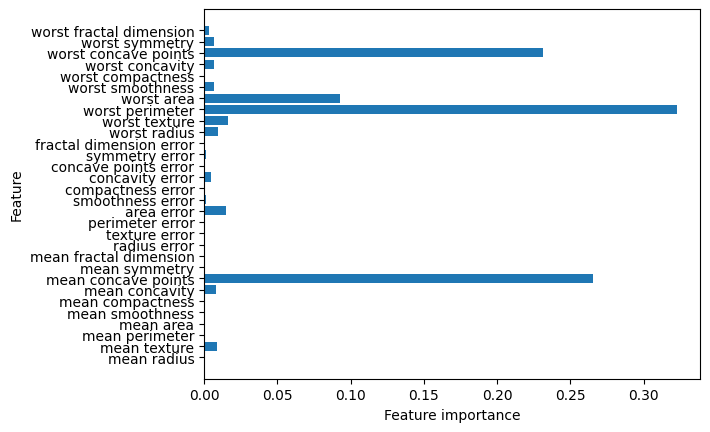

In [75]:
plot_feature_importances_cancer(gbrt1)

Modele lasów losowych i drzew wzmocnionych gradientowo działają dobrze na podobnych rodzajach danych, więc powszechnym podejściem jest wypróbowanie w pierwszej kolejności lasów losowych. Jeżeli las losowy działa dobrze, ale liczy się czas prognozowania lub jak najlepsze osiągi modelu, często pomaga zastosowanie modelu ze wzmocnieniem gradientu.

Modele zespołowe drzew decyzyjnych wzmocnionych gradientowo należą do najpotężniejszych algorytmów uczenia maszynowego. Działają dobrze bez skalowania, na połączeniach cech binarnych i ciągłych. Z drugiej strony wymagają dużo dostrajania, nie działają też dobrze na danych rzadkich wielowymiarowych.

Główne parametry, liczba drzew (n_estimators) i współczynnik uczenia (learning_rate), są ze sobą ściśle powiązane. Im niższy learning_rate, tym więcej drzew trzeba do budowy modelu o podobnej złożoności. W przeciwieństwie do lasów losowych, gdy większa liczba drzew zawsze jest korzystniejsza dla modelu, większa jej liczba w modelu ze wzmocnieniem gradientu prowadzi do zwiększenia złożoności i w rezultacie do overfittingu. Powszechna praktyka - dopasowanie liczby drzew w zależności od czasu i pamięci, a następnie testowanie różnych wartości współczynnika uczenia.

Inne ważne parametry dotyczą głębokości drzewa (max_depth i max_leaf_nodes). Dla modeli tych zwykle ustawia się niewielką głębokość drzew, nieprzekraczającą 5.